# Unsupervised Machine Learning for HELP International

## Project Overview and Brief

This dataset contains socio-economic and health factors that determine the overall development of countries. The purpose of the dataset is to help a charity fighting poverty to identify groups of
countries where it is needed most.

*Original file name:* country-data.csv

> **Find out more** about this dataset [here](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)

### Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country. *Example insight:* Which countries can be grouped together and have the highest need of help from the charity?

### About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of developing countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Extension

To extend the project, try using two different unsupervised learning algorithms and use methods
to measure their accuracy. Which model would you choose? Why?

## Import Packages and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px
import geoplot
import mapclassify

In [2]:
country = pd.read_csv('country.csv')
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## Descriptive Analysis

Descriptive analysis is being completed to summarise the dataset. This initial analysis is performed first to help build familiarity with the dataset and inform better decisions when building models later on. It is important at this stage not to generalise the results of this analysis for application to a larger population or try to make conclusions.

|Feature Name | Definition | Units/Measure |
|-------------|------------|---------------|
|country |Name of the country. |N/A |
|child_mort |Death of children under 5 years of age. |Average death count per 1000 live births |
|exports |Exports of goods and services per capita. |% GDP per capita |
|health |Total health spending per capita. |% GDP per capita |
|imports |Imports of goods and services per capita. |% GDP per capita |
|income |Net income per person. |US Dollars ($) |
|inflation |The measurement of the annual growth rate of the Total GDP. |GDP |
|life_expec |The average number of years a new born child would live if the current mortality patterns are to remain the same. |Average years |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain the same. |Average number of children |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |GDP |


In [3]:
country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Descriptive Analysis Takeaways

As the aim of the study is to ascertain which countries are most in need, the current focus will be identifying values assumed to be critical to a nation's overall wellbeing (e.g. highest income nation will not be recorded below).


- Globally, a mean value of 38 children out of every 1000 live births don't live to see age 5 years old.  

- The highest recorded child death count in a single nation is 208 (**Haiti**) which is more than **5 times** the global mean.  

- The country with the lowest health spending of 1.81% GDP per capita is **Qatar** (the global mean is around **4 times** higher)  

- The country with the lowest life expectancy of 32.1 years is **Haiti** (the global mean is around **2 times** higher)  

- The country with the lowest exports of 0.109% GDP per capita is **Myanmar** (the global mean is around **380 times** higher)  

- The country with the lowest imports of 0.0659% GDP per capita is **Myanmar** (the global mean is around **710 times** higher)  

- The country with the lowest income of $609 is Democratic Republic of **Congo** (the global mean is around **28 times** higher)  

- The country with the lowest total fertility of 1.15 children born if fertility rates stay the same is **Singapore** (the global mean is around **2.5 times** higher)  

- The country with the lowest gdpp of 231 GDP is **Burundi** (the global mean is around **56 times** higher)  

- The country with the highest inflation of 104 GDP growth rate per year is **Nigeria** (around **13 times** higher than the global mean)    


## Exploratory Analysis

Now exploratory analysis will be performed to examine the data further and potentially find relationships that weren’t previously known. This analysis will explore the relationships between the features and how they are corrrelated to each other (but will not suggest causation). 


In [4]:
# Use pandas profiling to create profile report of the data
country_profile = ProfileReport(country, title="Country Data Profiling Report", explorative=True)

In [5]:
# Generate HTML Profile Report 
country_profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


### Profiling Report Takeaways

- There are no missing or duplicate rows
- There are 10 features/columns of which there are 
    - 9 Numerical
    - 1 Categorical (country)  
- There are 167 countries listed 
- The following **high correlations** were found:
    - child_mort is highly correlated with income
    - exports is highly correlated with imports
    - life_expec is highly correlated with child_mort
    - total_fer is highly correlated with child_mort
    - gdpp is highly correlated with child_mort
    - gdpp is highly correlated with income
    - child_mort is highly correlated with inflation 
    - health is highly correlated with income
    - income is highly correlated with exports
    - gdpp is highly correlated with exports
    - country is uniformly distributed

In [6]:
# Pairplot to see correlations visualised
sns.pairplot(country, palette='Set1')

### Pairplot Correlations Summarised

- child_mort is negatively correlated with income
- exports is positively correlated with imports
- life_expec is negatively correlated with child_mort
- total_fer is positively correlated with child_mort
- gdpp is negatively correlated with child_mort
- gdpp is positively correlated with income
- child_mort is positively correlated with inflation 
- health is positively correlated with income
- income is positively correlated with exports
- gdpp is positively correlated with exports

In [7]:
# Replace country namesflagged as invalid for continent classification later on
# replace Congo name
country.at[37, 'country'] = 'Democratic Republic of the Congo'
country.at[38, 'country'] = 'Republic of the Congo'
# replace ivory coast name
country.at[40, 'country'] = 'Ivory Coast'
# replace Laos name
country.at[84, 'country'] = 'Laos'
# replace macedonia name
country.at[92, 'country'] = 'Macedonia'
# replace micronesia name
country.at[101, 'country'] = 'Micronesia'
# replace grenadines name
country.at[141, 'country'] = 'Saint Vincent and the Grenadines'

# select a single row using the below format
#country.loc[country['country'] == "Cote d'Ivoire"]

In [8]:
# Check names have been changed, see below cells

In [9]:
country.loc[country['country'] == "Ivory Coast"]

country  child_mort  exports  health  imports  income  inflation  \
40  Ivory Coast       111.0     50.6     5.3     43.3    2690       5.39   

    life_expec  total_fer  gdpp  
40        56.3       5.27  1220

In [10]:
country.loc[country['country'] == "Laos"]

country  child_mort  exports  health  imports  income  inflation  \
84    Laos        78.9     35.4    4.47     49.3    3980        9.2   

    life_expec  total_fer  gdpp  
84        63.8       3.15  1140

In [11]:
country.loc[country['country'] == "Macedonia"]

country  child_mort  exports  health  imports  income  inflation  \
92  Macedonia        10.4     39.8    7.09     58.1   11400       2.04   

    life_expec  total_fer  gdpp  
92        74.0       1.47  4540

In [12]:
country.loc[country['country'] == "Micronesia"]

country  child_mort  exports  health  imports  income  inflation  \
101  Micronesia        40.0     23.5    14.2     81.0    3340        3.8   

     life_expec  total_fer  gdpp  
101        65.4       3.46  2860

In [13]:
country.loc[country['country'] == "Saint Vincent and the Grenadines"]

country  child_mort  exports  health  imports  \
141  Saint Vincent and the Grenadines        20.7     26.9    4.47     57.1   

     income  inflation  life_expec  total_fer  gdpp  
141    9920       4.44        71.6       2.07  6230

In [14]:
country.at[149, 'country'] = "Timor-Leste" # invalid TL country code, this country is in Asia so find a way to append to continent column afterwards. Row data for TL is stored below.

In [15]:
country.loc[country['country'] == "Timor-Leste"]

country  child_mort  exports  health  imports  income  inflation  \
149  Timor-Leste        62.6      2.2    9.12     27.8    1850       26.5   

     life_expec  total_fer  gdpp  
149        71.1       6.23  3600

|    |country |child_mort |exports |health |imports |income |inflation |life_expec |total_fer |gdpp |
|----|--------|-----------|--------|-------|--------|-------|----------|-----------|----------|-----|
|149 |Timor-Leste |62.6 |2.2 |9.12 |27.8 |1850.0 |26.5 |71.1 |6.23 |3600.0 |


In [16]:
# drop timor-leste row and create copy of country called dropcountry

dropcountry = country.drop(labels=149, axis=0)

In [17]:
# print drop country to make sure timor was dropped
dropcountry.tail(20)

country  child_mort  exports  health  imports  income  \
146            Tajikistan        52.4     14.9    5.98     58.6    2110   
147              Tanzania        71.9     18.7    6.01     29.1    2090   
148              Thailand        14.9     66.5    3.88     60.8   13500   
150                  Togo        90.3     40.2    7.65     57.3    1210   
151                 Tonga        17.4     12.4    5.07     60.3    4980   
152               Tunisia        17.4     50.5    6.21     55.3   10400   
153                Turkey        19.1     20.4    6.74     25.5   18000   
154          Turkmenistan        62.0     76.3    2.50     44.5    9940   
155                Uganda        81.0     17.1    9.01     28.6    1540   
156               Ukraine        11.7     47.1    7.72     51.1    7820   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   
160               Uruguay        10.6     26.3    8.35     25.4   17100   
161            Uzbekistan        36.3     31.7    5.81     28.5    4240   
162               Vanuatu        29.2     46.6    5.25     52.7    2950   
163             Venezuela        17.1     28.5    4.91     17.6   16500   
164               Vietnam        23.3     72.0    6.84     80.2    4490   
165                 Yemen        56.3     30.0    5.18     34.4    4480   
166                Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
146      12.50        69.6       3.51    738  
147       9.25        59.3       5.43    702  
148       4.08        76.6       1.55   5080  
150       1.18        58.7       4.87    488  
151       3.68        69.9       3.91   3550  
152       3.82        76.9       2.14   4140  
153       7.01        78.2       2.15  10700  
154       2.31        67.9       2.83   4440  
155      10.60        56.8       6.15    595  
156      13.40        70.4       1.44   2970  
157      12.50        76.5       1.87  35000  
158       1.57        80.3       1.92  38900  
159       1.22        78.7       1.93  48400  
160       4.91        76.4       2.08  11900  
161      16.50        68.8       2.34   1380  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460

In [18]:
# print country to make sure all values are still present 

country.tail(20)

country  child_mort  exports  health  imports  income  \
147              Tanzania        71.9     18.7    6.01     29.1    2090   
148              Thailand        14.9     66.5    3.88     60.8   13500   
149           Timor-Leste        62.6      2.2    9.12     27.8    1850   
150                  Togo        90.3     40.2    7.65     57.3    1210   
151                 Tonga        17.4     12.4    5.07     60.3    4980   
152               Tunisia        17.4     50.5    6.21     55.3   10400   
153                Turkey        19.1     20.4    6.74     25.5   18000   
154          Turkmenistan        62.0     76.3    2.50     44.5    9940   
155                Uganda        81.0     17.1    9.01     28.6    1540   
156               Ukraine        11.7     47.1    7.72     51.1    7820   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   
160               Uruguay        10.6     26.3    8.35     25.4   17100   
161            Uzbekistan        36.3     31.7    5.81     28.5    4240   
162               Vanuatu        29.2     46.6    5.25     52.7    2950   
163             Venezuela        17.1     28.5    4.91     17.6   16500   
164               Vietnam        23.3     72.0    6.84     80.2    4490   
165                 Yemen        56.3     30.0    5.18     34.4    4480   
166                Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
147       9.25        59.3       5.43    702  
148       4.08        76.6       1.55   5080  
149      26.50        71.1       6.23   3600  
150       1.18        58.7       4.87    488  
151       3.68        69.9       3.91   3550  
152       3.82        76.9       2.14   4140  
153       7.01        78.2       2.15  10700  
154       2.31        67.9       2.83   4440  
155      10.60        56.8       6.15    595  
156      13.40        70.4       1.44   2970  
157      12.50        76.5       1.87  35000  
158       1.57        80.3       1.92  38900  
159       1.22        78.7       1.93  48400  
160       4.91        76.4       2.08  11900  
161      16.50        68.8       2.34   1380  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460

In [19]:
# Create extra feature for continents, use drop country for countries with invalid codes or unresolvable names

# define continents
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

# define countries
countries = dropcountry['country']

# create array which generates continent for each nation in the country dataframe from the country column 
continent_clf = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]
continent_clf


['Asia',
 'Europe',
 'Africa',
 'Africa',
 'North America',
 'South America',
 'Asia',
 'Australia',
 'Europe',
 'Asia',
 'North America',
 'Asia',
 'Asia',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Africa',
 'Asia',
 'South America',
 'Europe',
 'Africa',
 'South America',
 'Asia',
 'Europe',
 'Africa',
 'Africa',
 'Asia',
 'Africa',
 'North America',
 'Africa',
 'Africa',
 'Africa',
 'South America',
 'Asia',
 'South America',
 'Africa',
 'Africa',
 'Africa',
 'North America',
 'Africa',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'North America',
 'South America',
 'Africa',
 'North America',
 'Africa',
 'Africa',
 'Europe',
 'Australia',
 'Europe',
 'Europe',
 'Africa',
 'Africa',
 'Asia',
 'Europe',
 'Africa',
 'Europe',
 'North America',
 'North America',
 'Africa',
 'Africa',
 'South America',
 'North America',
 'Europe',
 'Europe',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Europe',
 'Asia',
 'Europe',
 'North America',
 'Asia',
 'Asia',
 'Asia',
 'Africa',
 'Austra

In [20]:
# Create new column called continent, add continent_clf output from above. No need to worry about order as each continent was generated in the order they were listed in the country dataframe (excluding timor-leste). 
dropcountry.insert(2, "continent", continent_clf, True)
dropcountry.tail(20) # 149, timor-leste should be missing

country  child_mort      continent  exports  health  \
146            Tajikistan        52.4           Asia     14.9    5.98   
147              Tanzania        71.9         Africa     18.7    6.01   
148              Thailand        14.9           Asia     66.5    3.88   
150                  Togo        90.3         Africa     40.2    7.65   
151                 Tonga        17.4      Australia     12.4    5.07   
152               Tunisia        17.4         Africa     50.5    6.21   
153                Turkey        19.1           Asia     20.4    6.74   
154          Turkmenistan        62.0           Asia     76.3    2.50   
155                Uganda        81.0         Africa     17.1    9.01   
156               Ukraine        11.7         Europe     47.1    7.72   
157  United Arab Emirates         8.6           Asia     77.7    3.66   
158        United Kingdom         5.2         Europe     28.2    9.64   
159         United States         7.3  North America     12.4   17.90   
160               Uruguay        10.6  South America     26.3    8.35   
161            Uzbekistan        36.3           Asia     31.7    5.81   
162               Vanuatu        29.2      Australia     46.6    5.25   
163             Venezuela        17.1  South America     28.5    4.91   
164               Vietnam        23.3           Asia     72.0    6.84   
165                 Yemen        56.3           Asia     30.0    5.18   
166                Zambia        83.1         Africa     37.0    5.89   

     imports  income  inflation  life_expec  total_fer   gdpp  
146     58.6    2110      12.50        69.6       3.51    738  
147     29.1    2090       9.25        59.3       5.43    702  
148     60.8   13500       4.08        76.6       1.55   5080  
150     57.3    1210       1.18        58.7       4.87    488  
151     60.3    4980       3.68        69.9       3.91   3550  
152     55.3   10400       3.82        76.9       2.14   4140  
153     25.5   18000       7.01        78.2       2.15  10700  
154     44.5    9940       2.31        67.9       2.83   4440  
155     28.6    1540      10.60        56.8       6.15    595  
156     51.1    7820      13.40        70.4       1.44   2970  
157     63.6   57600      12.50        76.5       1.87  35000  
158     30.8   36200       1.57        80.3       1.92  38900  
159     15.8   49400       1.22        78.7       1.93  48400  
160     25.4   17100       4.91        76.4       2.08  11900  
161     28.5    4240      16.50        68.8       2.34   1380  
162     52.7    2950       2.62        63.0       3.50   2970  
163     17.6   16500      45.90        75.4       2.47  13500  
164     80.2    4490      12.10        73.1       1.95   1310  
165     34.4    4480      23.60        67.5       4.67   1310  
166     30.9    3280      14.00        52.0       5.40   1460

In [21]:
# Add Timor-Leste back in, fill in "Asia" for continent column 

# Create new dataframe for Timor-Leste called TL using .loc from original country dataframe. Manually append continent column and impute value "Asia".
TL = pd.DataFrame(country.loc[country['country'] == "Timor-Leste"])
TL.insert(2, "continent", "Asia", True)
TL # print TL to see if the additions are present

country  child_mort continent  exports  health  imports  income  \
149  Timor-Leste        62.6      Asia      2.2    9.12     27.8    1850   

     inflation  life_expec  total_fer  gdpp  
149       26.5        71.1       6.23  3600

In [22]:
# Add timor-leste back into dropcountry using pd.concat
dropcountry = pd.concat([dropcountry, TL])
dropcountry.tail(20) # should see TL as last entry on dropcountry 

country  child_mort      continent  exports  health  \
147              Tanzania        71.9         Africa     18.7    6.01   
148              Thailand        14.9           Asia     66.5    3.88   
150                  Togo        90.3         Africa     40.2    7.65   
151                 Tonga        17.4      Australia     12.4    5.07   
152               Tunisia        17.4         Africa     50.5    6.21   
153                Turkey        19.1           Asia     20.4    6.74   
154          Turkmenistan        62.0           Asia     76.3    2.50   
155                Uganda        81.0         Africa     17.1    9.01   
156               Ukraine        11.7         Europe     47.1    7.72   
157  United Arab Emirates         8.6           Asia     77.7    3.66   
158        United Kingdom         5.2         Europe     28.2    9.64   
159         United States         7.3  North America     12.4   17.90   
160               Uruguay        10.6  South America     26.3    8.35   
161            Uzbekistan        36.3           Asia     31.7    5.81   
162               Vanuatu        29.2      Australia     46.6    5.25   
163             Venezuela        17.1  South America     28.5    4.91   
164               Vietnam        23.3           Asia     72.0    6.84   
165                 Yemen        56.3           Asia     30.0    5.18   
166                Zambia        83.1         Africa     37.0    5.89   
149           Timor-Leste        62.6           Asia      2.2    9.12   

     imports  income  inflation  life_expec  total_fer   gdpp  
147     29.1    2090       9.25        59.3       5.43    702  
148     60.8   13500       4.08        76.6       1.55   5080  
150     57.3    1210       1.18        58.7       4.87    488  
151     60.3    4980       3.68        69.9       3.91   3550  
152     55.3   10400       3.82        76.9       2.14   4140  
153     25.5   18000       7.01        78.2       2.15  10700  
154     44.5    9940       2.31        67.9       2.83   4440  
155     28.6    1540      10.60        56.8       6.15    595  
156     51.1    7820      13.40        70.4       1.44   2970  
157     63.6   57600      12.50        76.5       1.87  35000  
158     30.8   36200       1.57        80.3       1.92  38900  
159     15.8   49400       1.22        78.7       1.93  48400  
160     25.4   17100       4.91        76.4       2.08  11900  
161     28.5    4240      16.50        68.8       2.34   1380  
162     52.7    2950       2.62        63.0       3.50   2970  
163     17.6   16500      45.90        75.4       2.47  13500  
164     80.2    4490      12.10        73.1       1.95   1310  
165     34.4    4480      23.60        67.5       4.67   1310  
166     30.9    3280      14.00        52.0       5.40   1460  
149     27.8    1850      26.50        71.1       6.23   3600

In [23]:
# Reorder/sort dataframe so that timor-leste is back where it originally was. Name the new sorted dataframe country2 

country2 = dropcountry.sort_values('country')
country2.tail(20) # TL should be seen back in original spot after Thailand

country  child_mort      continent  exports  health  \
147              Tanzania        71.9         Africa     18.7    6.01   
148              Thailand        14.9           Asia     66.5    3.88   
149           Timor-Leste        62.6           Asia      2.2    9.12   
150                  Togo        90.3         Africa     40.2    7.65   
151                 Tonga        17.4      Australia     12.4    5.07   
152               Tunisia        17.4         Africa     50.5    6.21   
153                Turkey        19.1           Asia     20.4    6.74   
154          Turkmenistan        62.0           Asia     76.3    2.50   
155                Uganda        81.0         Africa     17.1    9.01   
156               Ukraine        11.7         Europe     47.1    7.72   
157  United Arab Emirates         8.6           Asia     77.7    3.66   
158        United Kingdom         5.2         Europe     28.2    9.64   
159         United States         7.3  North America     12.4   17.90   
160               Uruguay        10.6  South America     26.3    8.35   
161            Uzbekistan        36.3           Asia     31.7    5.81   
162               Vanuatu        29.2      Australia     46.6    5.25   
163             Venezuela        17.1  South America     28.5    4.91   
164               Vietnam        23.3           Asia     72.0    6.84   
165                 Yemen        56.3           Asia     30.0    5.18   
166                Zambia        83.1         Africa     37.0    5.89   

     imports  income  inflation  life_expec  total_fer   gdpp  
147     29.1    2090       9.25        59.3       5.43    702  
148     60.8   13500       4.08        76.6       1.55   5080  
149     27.8    1850      26.50        71.1       6.23   3600  
150     57.3    1210       1.18        58.7       4.87    488  
151     60.3    4980       3.68        69.9       3.91   3550  
152     55.3   10400       3.82        76.9       2.14   4140  
153     25.5   18000       7.01        78.2       2.15  10700  
154     44.5    9940       2.31        67.9       2.83   4440  
155     28.6    1540      10.60        56.8       6.15    595  
156     51.1    7820      13.40        70.4       1.44   2970  
157     63.6   57600      12.50        76.5       1.87  35000  
158     30.8   36200       1.57        80.3       1.92  38900  
159     15.8   49400       1.22        78.7       1.93  48400  
160     25.4   17100       4.91        76.4       2.08  11900  
161     28.5    4240      16.50        68.8       2.34   1380  
162     52.7    2950       2.62        63.0       3.50   2970  
163     17.6   16500      45.90        75.4       2.47  13500  
164     80.2    4490      12.10        73.1       1.95   1310  
165     34.4    4480      23.60        67.5       4.67   1310  
166     30.9    3280      14.00        52.0       5.40   1460

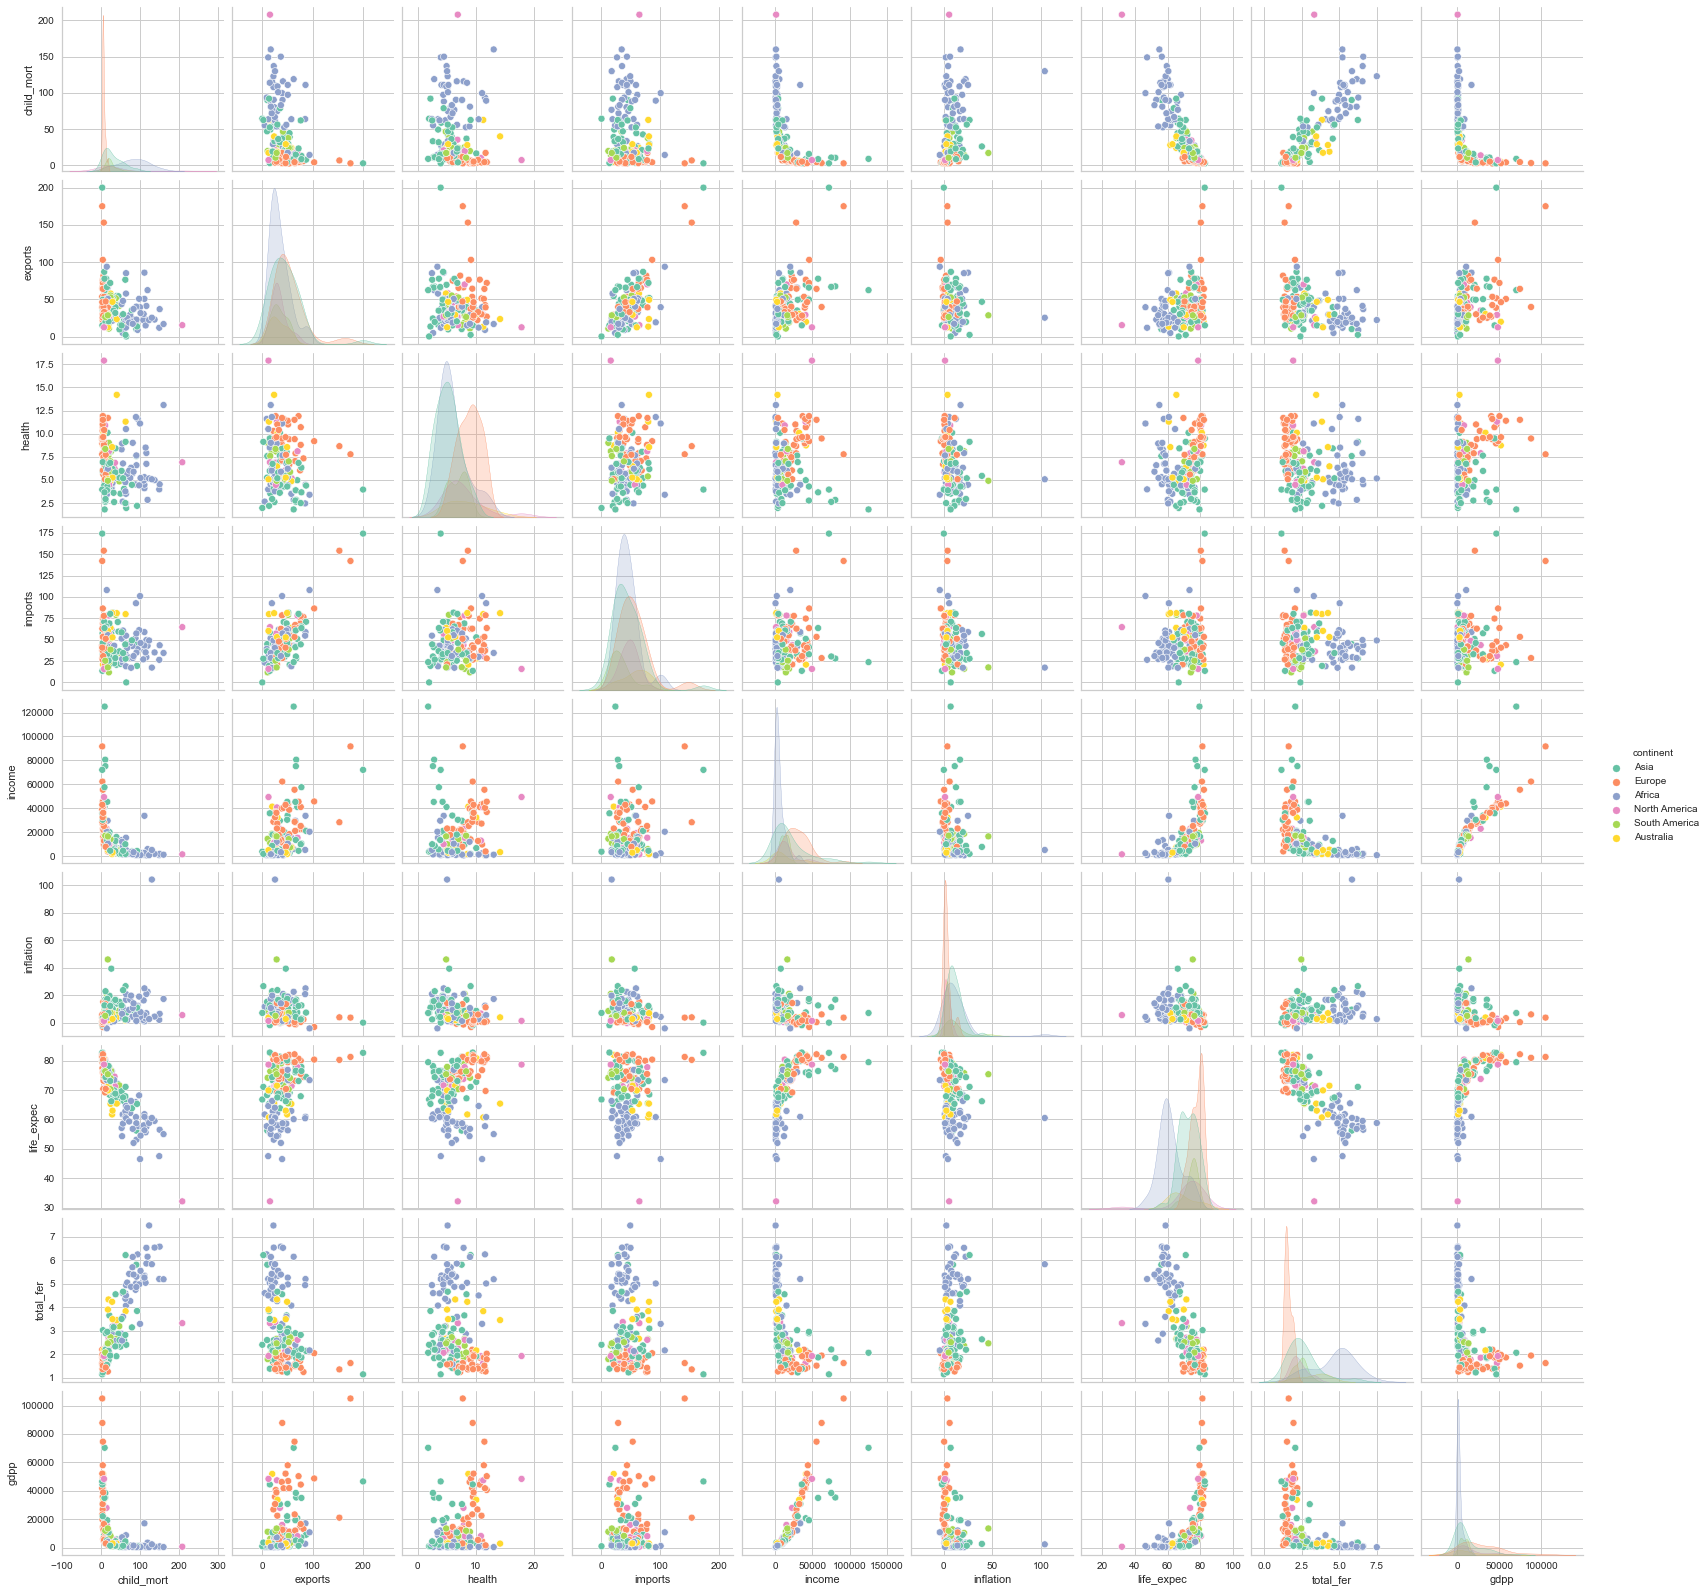

In [48]:
# Pairplot to see correlations visualised, by continent

sns.pairplot(country2, palette='Set2', hue="continent")

### Continent Pairplot Correlations Summarised (currently unfinished)

- child_mort is negatively correlated with income:
    - Asian countries generally experience low child_mort, varied income (shown in **dark green**)
    - European countries generally experience low child_mort, varied income (shown in **orange**)
    - **African countries generally experience high child_mort, low income** (shown in **blue**)
    - North American countries generally experience low child_mort, medium income (shown in **pink**) [except Haiti with high child_mort, low income] 
    - South American countries generally experience low child_mort, low income (shown in **light green**)
    - Australian countries generally experience low child_mort, low income (shown in **yellow**) 
&nbsp;
- exports is positively correlated with imports:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**) 
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  
&nbsp;
- life_expec is negatively correlated with child_mort:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**) [except Haiti] 
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  
&nbsp;
- total_fer is positively correlated with child_mort:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  
&nbsp;
- gdpp is negatively correlated with child_mort:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  
&nbsp;
- gdpp is positively correlated with income:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  
&nbsp;
- child_mort is positively correlated with inflation
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  


- health is positively correlated with income:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  


- income is positively correlated with exports:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)  


- gdpp is positively correlated with exports:
    - Asian countries generally experience lowest child_mort, highest gdpp (shown in **dark green**)
    - European countries generally experience lowest child_mort, highest gdpp (shown in **orange**)
    - African countries generally experience high child_mort, low gdpp (shown in **blue**)
    - North American countries generally experience lowest child_mort, highest gdpp (shown in **pink**)
    - South American countries generally experience lowest child_mort, highest gdpp (shown in **light green**)
    - Australian countries generally experience lowest child_mort, highest gdpp (shown in **yellow**)

In [25]:
## Create interactive 3D scatter plot for imports vs exports vs gdpp

fig = px.scatter_3d(country2, x='imports', y='exports', z='gdpp', color='continent', title="Imports vs Exports vs GDP")
fig.show()

### Imports vs Exports vs GDP Summary

- Asia generally shows varied imports, varied exports, low GDP
- Europe generally shows low imports, high exports, high GDP
- Africa generally shows high imports, low exports, low GDP
- North America generally shows medium imports, low exports, low GDP
- South America generally shows low imports, low exports, low GDP
- Australia generally shows high imports, low exports, low GDP


In [26]:
## Create interactive 3D scatter plot for child mort vs life expec vs health spending

fig = px.scatter_3d(country2, x='child_mort', y='life_expec', z='health', color='continent', title="Child mortality vs Life expectancy vs Health spending per Capita")
fig.show()

### Child mortality vs Life expectancy vs Health spending per Capita Summary

- Asia generally shows varied child mortality, high life expectancy, varied health spending
- Europe generally shows low child mortality, high life expectancy, high health spending
- Africa generally shows high child mortality, medium life expectancy, varied health spending
- North America generally shows low child mortality, high life expectancy, high health spending
- South America generally shows low child mortality, high life expectancy, low health spending
- Australia generally shows low child mortality, high life expectancy, high health spending

In [27]:
# pie chart to show percentage of health spending by continents

fig = px.pie(country2, values='health', names='continent', title='Total Health Spending per Capita, by continent')
fig.show()

- Europe accounts the majority of the world's health spending (30.6%) 
- Australia accounts for the minority of the world's health spending (6.55%)

In [28]:
# pie chart to show percentage of gdpp spending by continents

fig = px.pie(country2, values='gdpp', names='continent', title='Total GDP per Capita, by continent')
fig.show()

- Europe accounts for the majority of the world's GDP (51.4%)
- South America accounts for the minority of the world's GDP (4.26%)

In [29]:
# pie chart to show percentage of child_mort spending by continents

fig = px.pie(country2, values='child_mort', names='continent', title='Child Mortality, by continent')
fig.show()

- Africa accounts for the majority of the world's Child Mortality (60.4%)
- Australia accounts for the minority of the world's Child Mortality (3.62%)

In [30]:
# pie chart to show percentage of income spending by continents

fig = px.pie(country2, values='income', names='continent', title='Total Income in Dollars ($), by continent')
fig.show()

- Europe accounts for the majority of the world's Income (40.8%)
- Australia accounts for the minority of the world's Income (3.54%)

In [31]:
# Plot bubble chart of gdp vs mortality
fig = px.scatter(country2, x="gdpp", y="life_expec", size="income", color="continent", hover_name="country", log_x=True, size_max=60, title="Life Expectancy vs GDP per Capita, by Income")
fig.show()

- Low Income and low GDP countries have lower Life Expectancy

### Proposed Questions, so far

- Which countries need the most help?
- Are the countries most in need in the same continent?
- Will money solve the problems experienced by the countries in most need?
- Which countries are most suitable for receiving financial aid based on the previous questions?
- What other factors affect whether a country will benefit from aid (e.g. local law and politics)? 
- What other forms of aid are recommended?
- What is the maximum number of countries that can be selected for financial aid (i.e. how many can be suported before the money is spread too thin between nations in need)? 

## Machine Learning

### Data Scaling

The data must be scaled due to the high differences in ranges between features. Features with high ranges will be scaled down for better comparison against features with smaller ranges. 

In [33]:
# drop country and continent, numerical data only
country3 = country2.drop(['country', 'continent'], axis =1)
country3.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [35]:
# MinMax Scaler

columns = country3.columns

scaler1 = MinMaxScaler()

country3_minmax = scaler1.fit_transform(country3)
country3_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [36]:
# Standard Scaler

columns = country3.columns

scaler2 = StandardScaler()

country3_standard = scaler2.fit_transform(country3)
country3_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [37]:
# MinMax Dataframe

df_minmax = pd.DataFrame(data= country3_minmax , columns = columns )
df_minmax

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

In [38]:
# Standardised Dataframe

df_standard = pd.DataFrame(data= country3_standard , columns = columns)
df_standard

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

### Compare the scalers visually

In [39]:
sns.pairplot(df_minmax, palette='Set2')

In [ ]:
sns.pairplot(df_standard, palette='Set2')

### Feature Selection 

### Split Dataset 

### Train model